## Bike Sharing Assignment

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Goal is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


In [1166]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd #To work with dataset
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import seaborn as sns#visualization
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Importing statsmodels
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1167]:
#Displays all the rows
pd.set_option('display.max_rows', None)
#Standardise precision
pd.options.display.float_format = "{:,.4f}".format
#Set style for plots
sns.set(style = "whitegrid")

In [1168]:
#Read the input file 'day.csv'
df_bike= pd.read_csv("day.csv")
#Display first few rows
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [1169]:
#check the shape of the dataframe
df_bike.shape

(730, 16)

In [1170]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1171]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9973,0.6836,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,"3,658.7575","4,508.0068"
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0062,0.4654,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,"1,559.7587","1,936.0116"
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,"2,502.2500","3,169.7500"
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,"3,664.5000","4,548.5000"
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,"1,096.5000","4,783.2500","5,966.0000"
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,"3,410.0000","6,946.0000","8,714.0000"


In [1172]:
# Count the number of missing values in each column of the dataset
df_bike.isna().sum()
#No missing values in the columns as per output

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1173]:
# Counting the number of rows have all missing values
print('Number of empty Rows:')
print(df_bike.isnull().all(axis=1).sum())
# --> There are no empty rows in whole dataset.

# Counting the number of columns have all missing values
print('Number of empty Columns:')
print(df_bike.isnull().all(axis=0).sum())
# --> There are no empty columns in whole dataset.

Number of empty Rows:
0
Number of empty Columns:
0


day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [1174]:
#Check the values present in the columns which has unique values from the above description
print("\ninstant unique values: ",len(pd.unique(df_bike["instant"])))
print("\ndteday unique values: ",len(pd.unique(df_bike["dteday"])))


instant unique values:  730

dteday unique values:  730


instance column can be deleted as it dont add much importance.
from dteday column we can derive many columns such as date, week of the day etc.but since already we have whether day is holiday or working day or weekday deriving again is not required. So deleting this column.

casual and registered columns can be deleted as we are going to analyze on total number of bikes but not on based on their usage category.

In [1175]:
# drop the unnecessary or redundant columns
df_bike.drop(df_bike[["instant","dteday","casual","registered"]],axis=1,inplace=True)
df_bike.shape

(730, 12)

In [1176]:
# Renaming few columns for better readibility

df_bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

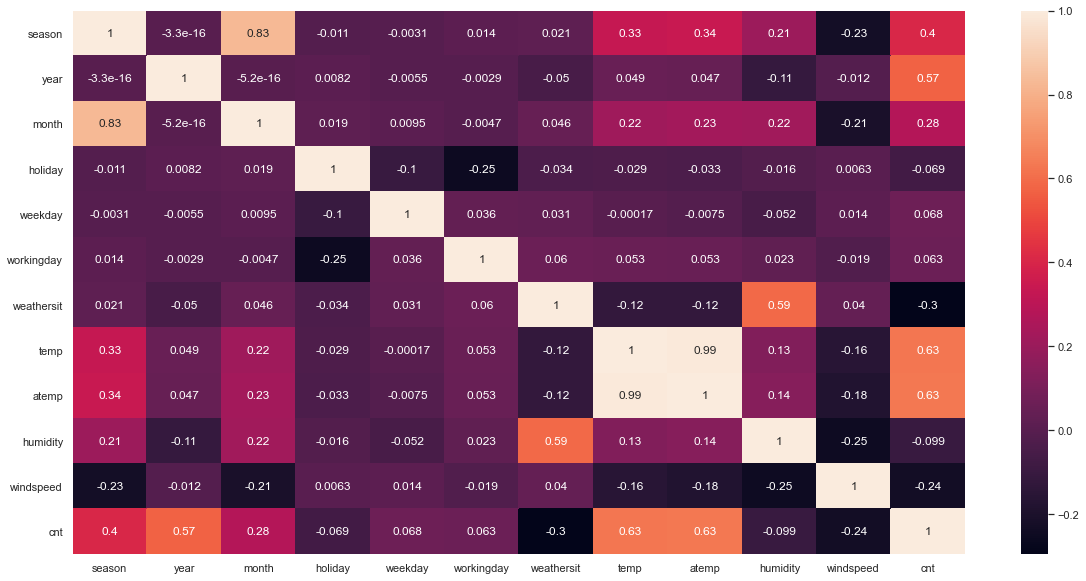

In [1177]:
#correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(df_bike.corr(),annot=True)
plt.show()

There exists correlation between different variables.

In [1178]:
#Check the datatypes of the columns
df_bike.dtypes

season          int64
year            int64
month           int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
cnt             int64
dtype: object

In [1179]:
#Encoding data in the coulmns(season,month,weathersit,weekday) to appropriate values as per data dictionary for better understanding
df_bike.season = df_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_bike.month = df_bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_bike.weathersit = df_bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_rain'})
df_bike.weekday=df_bike.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [1180]:
df_bike.head(20)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Misty,14.1108,18.1812,80.5833,10.7499,985
1,spring,0,Jan,0,Sunday,0,Misty,14.9026,17.6869,69.6087,16.6521,801
2,spring,0,Jan,0,Monday,1,Clear,8.0509,9.4703,43.7273,16.6367,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.2000,10.6061,59.0435,10.7398,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.3052,11.4635,43.6957,12.5223,1600
5,spring,0,Jan,0,Thursday,1,Clear,8.3783,11.6605,51.8261,6.0009,1606
6,spring,0,Jan,0,Friday,1,Misty,8.0574,10.4420,49.8696,11.3046,1510
7,spring,0,Jan,0,Saturday,0,Misty,6.7650,8.1127,53.5833,17.8759,959
8,spring,0,Jan,0,Sunday,0,Clear,5.6717,5.8087,43.4167,24.2507,822
9,spring,0,Jan,0,Monday,1,Clear,6.1842,7.5444,48.2917,14.9589,1321


In [1181]:
df_bike.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
cnt             int64
dtype: object

In [1182]:
#Convert the categorical columns to Category datatype
df_bike[['season','weathersit','month','weekday','year','holiday','workingday']]=df_bike[['season','weathersit','month','weekday','year','holiday','workingday']].astype('category')
df_bike.dtypes

season        category
year          category
month         category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
cnt              int64
dtype: object

## Visualising Data

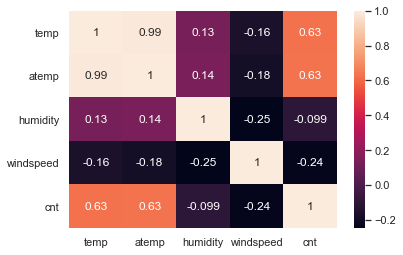

In [1183]:
#Check correlation between numerical variables
sns.heatmap(df_bike.corr(),annot=True)
plt.show()

temp, atemp are highly correlated with eachother. And both these variables are correlated with cnt variable.

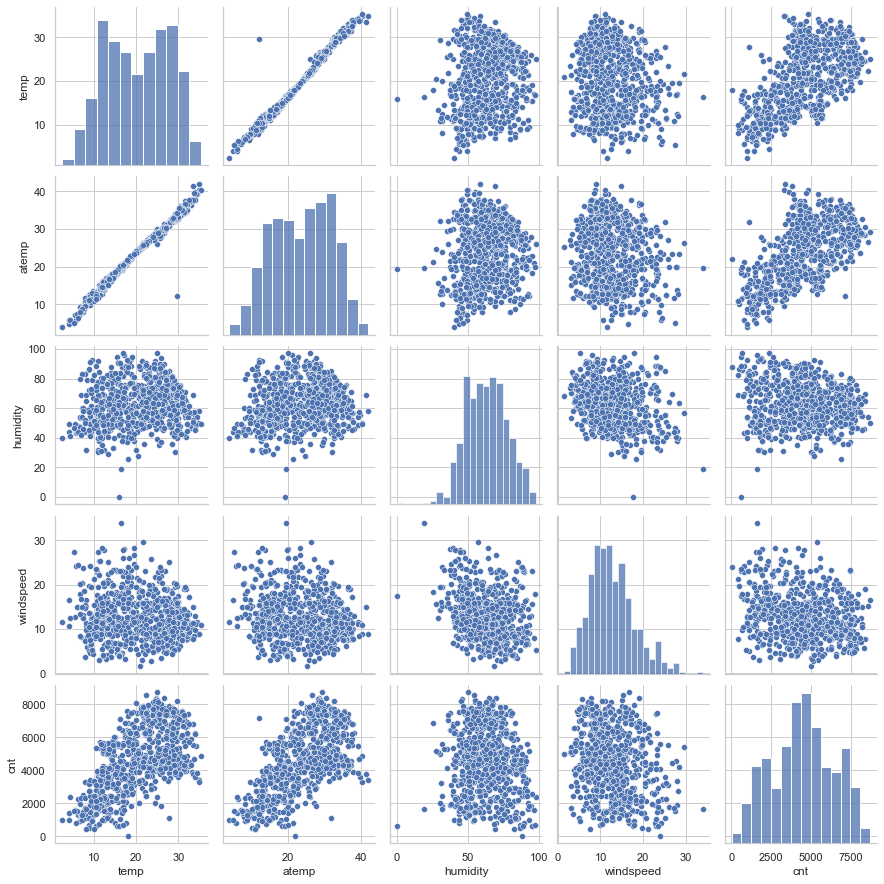

In [1184]:
#pairplot for all numerical variables
sns.pairplot(df_bike)
plt.show()

temp,atemp are highly correlated. There is a linear relation ship with cnt variable(output variable) but both of them cannot be used while creating a model due to MultiCollinearity. Will review them while building the model.

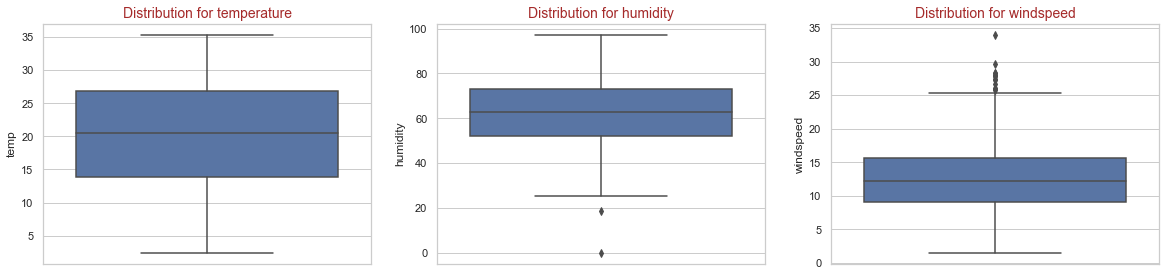

In [1185]:
#Create box plots for different columns to check the distribution and any outliers
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(y=df_bike.temp)
plt.title("Distribution for temperature",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(3,3,2)
sns.boxplot(y=df_bike.humidity)
plt.title("Distribution for humidity",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(3,3,3)
sns.boxplot(y=df_bike.windspeed)
plt.title("Distribution for windspeed",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

### Visualizing Categorical variables

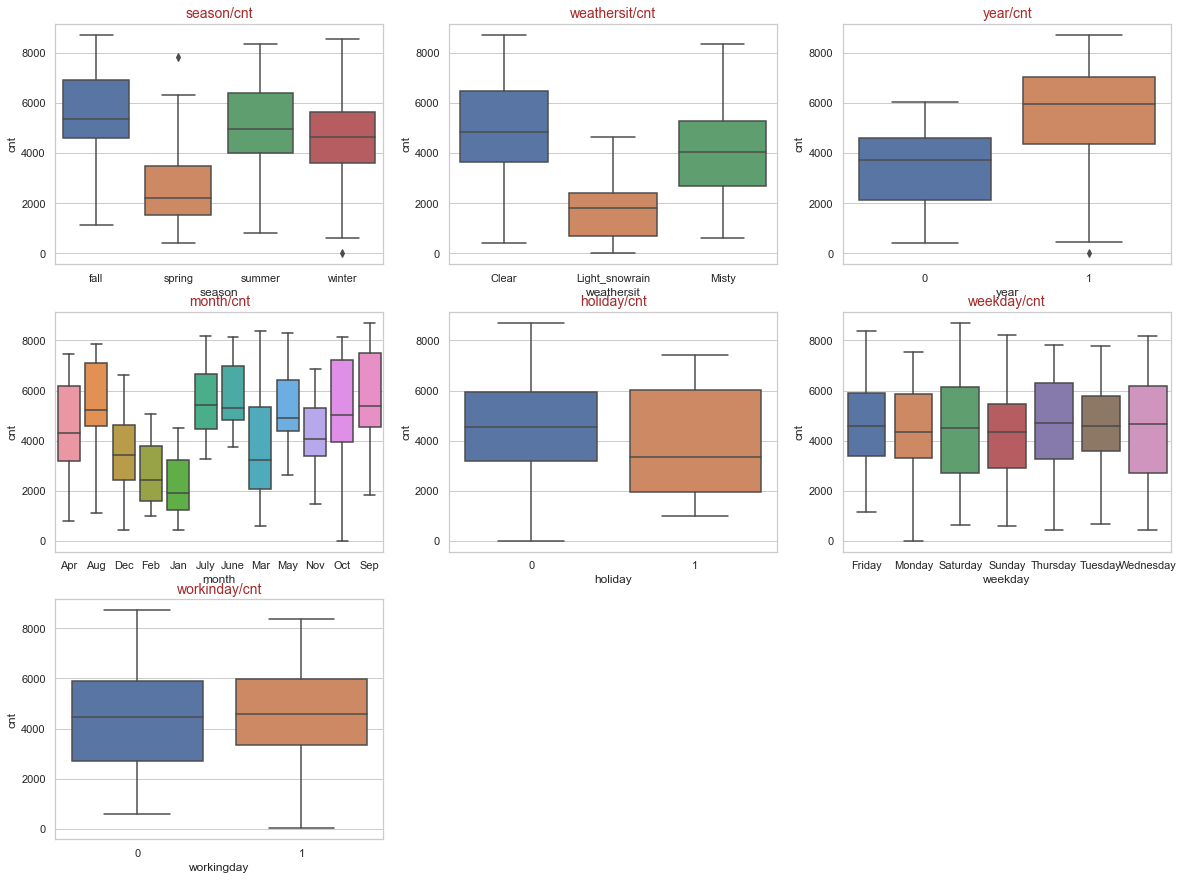

In [1186]:
#Visualizing different categorical variables with respect to cnt variable(Bivariate analysis)
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike)
plt.title("season/cnt",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike)
plt.title("weathersit/cnt",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(3,3,3)
sns.boxplot(x = 'year', y = 'cnt', data = df_bike)
plt.title("year/cnt",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(3,3,4)
sns.boxplot(x = 'month', y = 'cnt', data = df_bike)
plt.title("month/cnt",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.title("holiday/cnt",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.title("weekday/cnt",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)
plt.title("workinday/cnt",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

From the above box plots we can see that
1. count of bike sharing is less in spring season.
2. When there is light rain count is less and no bikes has been borrowed when there is heavy rain.
3. There is a increasing trend in borrowing bikes yearwise.2019 count is more compared to 2018.
4. Bikes has been borrowed more in the mid of the year and in increasing trend from May to October months and then slowly started decreasing.
5. During holidays count is less compared to non holidays.
6. Working day or Non working day is almost similar in bookings.
7. year 2019 has more number of bookings compared to 2018. So there is much progress in business yearwise

### Dummy Variables

In [1187]:
# creating dummy variables for season , month ,weathersit ,weekday
df_dummy =pd.get_dummies(df_bike[['season','month','weekday','weathersit']], drop_first = True)
# Add the results to the original df_bike dataframe
df_bike = pd.concat([df_bike, df_dummy], axis = 1)
# Now let's see the head of our dataframe.
df_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snowrain,weathersit_Misty
0,spring,0,Jan,0,Saturday,0,Misty,14.1108,18.1812,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Misty,14.9026,17.6869,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear,8.0509,9.4703,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.2000,10.6061,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.3052,11.4635,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [1188]:
# Drop the columns for which  we have created the dummies.
df_bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
df_bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.1108,18.1812,80.5833,10.7499,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.9026,17.6869,69.6087,16.6521,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.0509,9.4703,43.7273,16.6367,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.2000,10.6061,59.0435,10.7398,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.3052,11.4635,43.6957,12.5223,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [1189]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling features

In [1190]:
scaler=MinMaxScaler()

In [1191]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,0.5099,0.5011,0.5754,0.3008,0.8642,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.8152,0.7664,0.7256,0.2647,0.8277,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.4424,0.4390,0.6402,0.2553,0.4653,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.2451,0.2003,0.4981,0.6631,0.2041,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.3957,0.3917,0.5045,0.1885,0.4830,0,1,...,0,0,0,1,0,0,0,0,0,1


In [1192]:
df_train.describe()

,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snowrain,weathersit_Misty
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,...,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.5373,0.5130,0.6504,0.3208,0.5136,0.2431,0.2451,0.2490,0.0961,0.0843,...,0.0863,0.0804,0.1510,0.1549,0.1431,0.1333,0.1314,0.1588,0.0294,0.3431
std,0.2258,0.2124,0.1459,0.1698,0.2246,0.4294,0.4306,0.4329,0.2950,0.2781,...,0.2810,0.2722,0.3584,0.3622,0.3506,0.3403,0.3381,0.3659,0.1691,0.4752
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3399,0.3321,0.5386,0.1992,0.3564,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.5405,0.5268,0.6537,0.2968,0.5186,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.7352,0.6885,0.7548,0.4144,0.6847,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


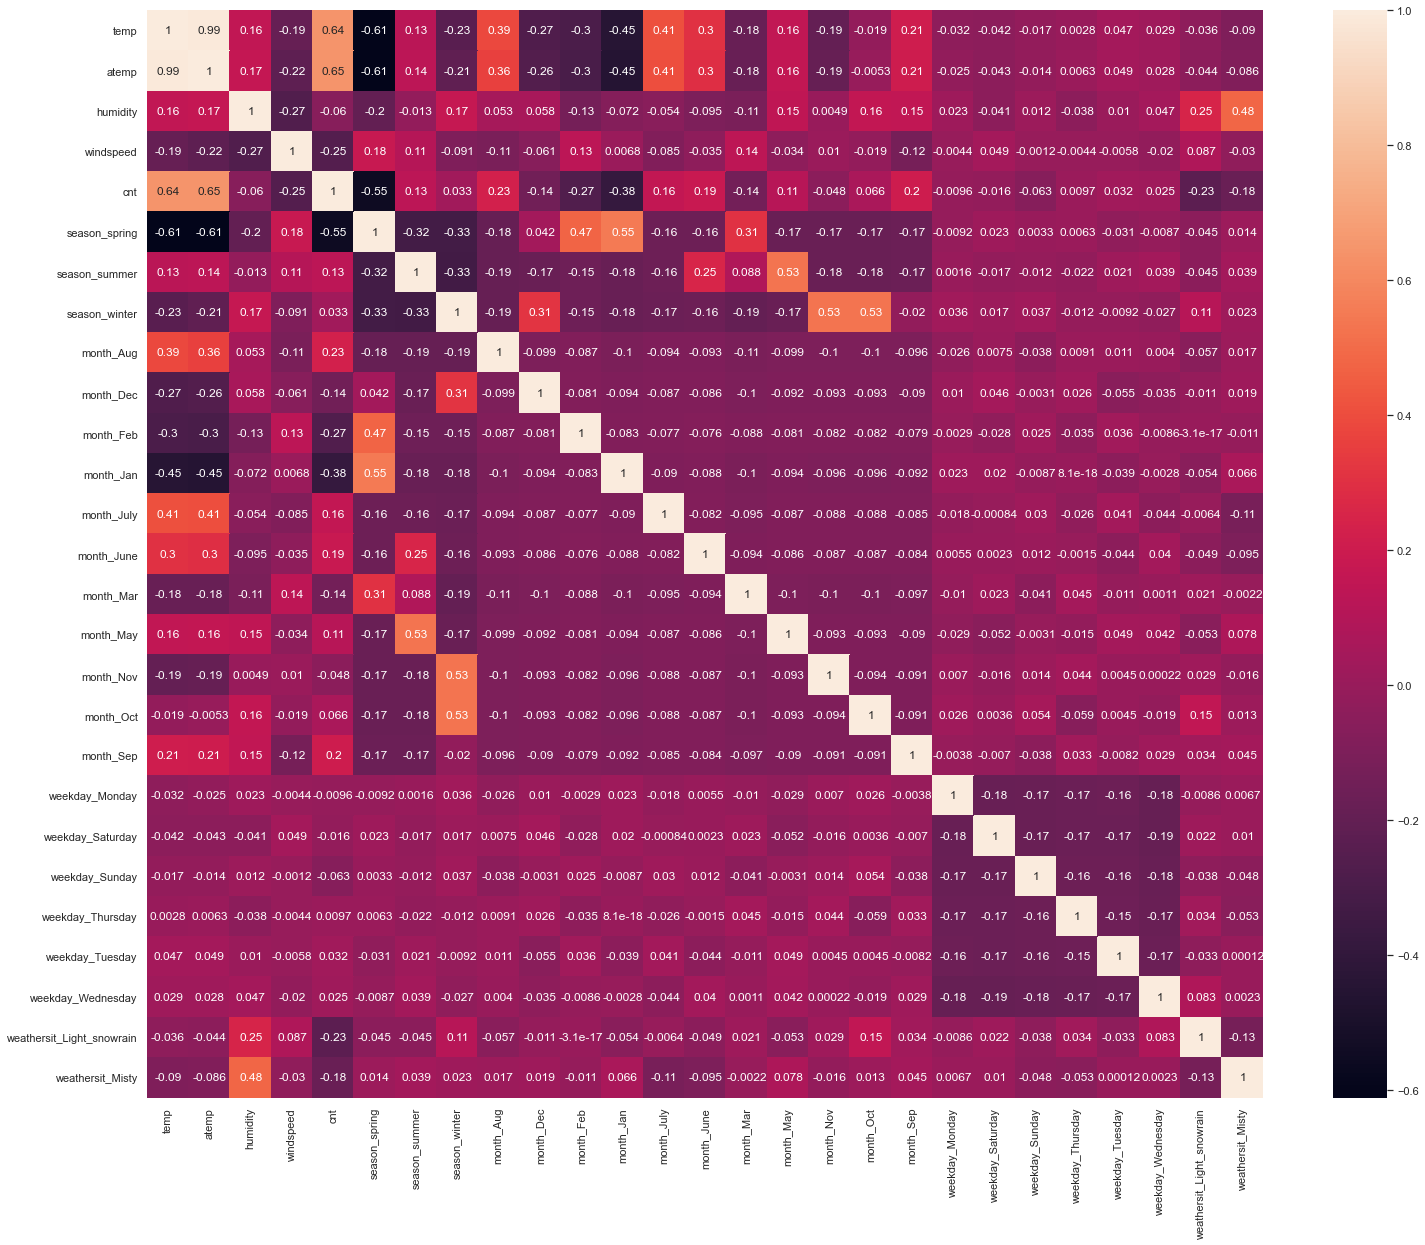

In [1193]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

### Dividing into X and Y sets for the model building

In [1194]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

In [1195]:
#Building Base Linear Model with all the features
X_train_baselm=sm.add_constant(X_train)
#Running linear model
baselr=sm.OLS(y_train,X_train_baselm).fit()
#Let's see the summary of Base linear model
print(baselr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          8.42e-181
Time:                        22:43:29   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1196]:
# Calculate the VIFs for the model
def calculate_VIF(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [1197]:
#Calculate VIFs for X_train columns
calculate_VIF(X_train)

,Features,VIF
2,workingday,85.6000
3,temp,67.1200
4,atemp,56.0900
22,weekday_Saturday,19.7200
23,weekday_Sunday,18.3500
7,season_spring,10.8000
9,season_winter,9.5200
8,season_summer,8.3100
18,month_Nov,6.8000
19,month_Oct,6.5900


From the base model we have many features whose p value is greater than 0.05 and which has much higher values for VIF.
We will proceed with RFE and eliminate few features and then perform manual feature elimination.

Using the LinearRegression function from SciKit Learn for its compatibility with RFE(Recursive Feature Elimination)

In [1198]:
# Running RFE with the output number of the variables equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [1199]:
#List of variables selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 13),
 ('month_Dec', False, 3),
 ('month_Feb', False, 4),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 5),
 ('month_Mar', False, 9),
 ('month_May', False, 15),
 ('month_Nov', False, 2),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('weekday_Monday', False, 14),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [1200]:
#Selecting the columns via RFE
cols=X_train.columns[rfe.support_]
cols

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_Jan',
       'month_July', 'month_Sep', 'weekday_Saturday',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [1201]:
#Checking rejected columns
X_train.columns[~rfe.support_]

Index(['atemp', 'month_Aug', 'month_Dec', 'month_Feb', 'month_June',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'weekday_Monday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [1202]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [1203]:
#Building first Linear Model with all the features slected by RFE
X_train_lm1=sm.add_constant(X_train_rfe)
#Running linear model
lr1=sm.OLS(y_train,X_train_lm1).fit()
#Let's see the summary of first linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          2.31e-191
Time:                        22:43:29   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1204]:
#Calculate VIFs for X_train_rfe columns
calculate_VIF(X_train_rfe)

,Features,VIF
4,humidity,29.4000
3,temp,17.7700
2,workingday,5.3100
5,windspeed,4.7300
6,season_spring,4.5300
8,season_winter,3.4800
7,season_summer,2.8400
14,weathersit_Misty,2.2900
0,year,2.0900
12,weekday_Saturday,1.9800


Since all the p values looks fine,based on VIF value,dropping humidity column.

In [1205]:
#Drop humidity column. Even though p value is less based on VIF value dopping this column.
X_train_cols_lm2 = X_train_rfe.drop(['humidity'], axis = 1)

In [1206]:
#Building second Linear Model
X_train_lm2=sm.add_constant(X_train_cols_lm2)
#Running linear model
lr2=sm.OLS(y_train,X_train_lm2).fit()
#Let's see the summary of second linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          7.33e-189
Time:                        22:43:29   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1207]:
#Calcluate VIF
calculate_VIF(X_train_cols_lm2)

,Features,VIF
3,temp,7.0700
2,workingday,5.2400
4,windspeed,4.6700
5,season_spring,3.0800
6,season_summer,2.3300
0,year,2.0800
7,season_winter,1.9900
11,weekday_Saturday,1.9700
8,month_Jan,1.6200
9,month_July,1.5900


In [1208]:
#Dropping workingday column. From the data visualization we feel that temperature is important column 
#so dropping workinday even temperature has higher VIF compared to working day
X_train_cols_lm3 = X_train_cols_lm2.drop(['workingday'], axis = 1)

In [1209]:
#Building third Linear Model
X_train_lm3=sm.add_constant(X_train_cols_lm3)
#Running linear model
lr3=sm.OLS(y_train,X_train_lm3).fit()
#Let's see the summary of third linear model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          1.21e-186
Time:                        22:43:29   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1210]:
#Calcluate VIF
calculate_VIF(X_train_cols_lm3)

,Features,VIF
2,temp,5.1600
3,windspeed,4.6400
4,season_spring,2.7600
5,season_summer,2.2300
0,year,2.0700
6,season_winter,1.8000
7,month_Jan,1.6100
8,month_July,1.5900
12,weathersit_Misty,1.5600
9,month_Sep,1.3400


In [1211]:
#Dropping weekday_Saturday column by checking both VIF and p value
X_train_cols_lm4 = X_train_cols_lm3.drop(['weekday_Saturday'], axis = 1)

In [1212]:
#Building fourth Linear Model
X_train_lm4=sm.add_constant(X_train_cols_lm4)
#Running linear model
lr4=sm.OLS(y_train,X_train_lm4).fit()
#Let's see the summary of fourth linear model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          3.97e-187
Time:                        22:43:29   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1213]:
#Calcluate VIF
calculate_VIF(X_train_cols_lm4)

,Features,VIF
2,temp,5.1300
3,windspeed,4.6100
4,season_spring,2.7500
5,season_summer,2.2200
0,year,2.0700
6,season_winter,1.7900
7,month_Jan,1.6100
8,month_July,1.5900
11,weathersit_Misty,1.5600
9,month_Sep,1.3400


In [1214]:
#Dropping month_Jan column by checking both VIF and p value
X_train_cols_lm5 = X_train_cols_lm4.drop(['month_Jan'], axis = 1)

In [1215]:
#Building fifth Linear Model
X_train_lm5=sm.add_constant(X_train_cols_lm5)
#Running linear model
lr5=sm.OLS(y_train,X_train_lm5).fit()
#Let's see the summary of fifth linear model
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          2.40e-187
Time:                        22:43:29   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1216]:
#Calcluate VIF
calculate_VIF(X_train_cols_lm5)

,Features,VIF
2,temp,5.0900
3,windspeed,4.6000
5,season_summer,2.2100
4,season_spring,2.0800
0,year,2.0700
6,season_winter,1.7900
7,month_July,1.5800
10,weathersit_Misty,1.5500
8,month_Sep,1.3400
9,weathersit_Light_snowrain,1.0800


In [1217]:
#Dropping month_July column by checking both VIF and p value
X_train_cols_lm6 = X_train_cols_lm5.drop(['month_July'], axis = 1)

In [1218]:
#Building sixth Linear Model
X_train_lm6=sm.add_constant(X_train_cols_lm6)
#Running linear model
lr6=sm.OLS(y_train,X_train_lm6).fit()
#Let's see the summary of sixth linear model
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          7.36e-187
Time:                        22:43:29   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1219]:
#Calcluate VIF
calculate_VIF(X_train_cols_lm6)

,Features,VIF
3,windspeed,4.5900
2,temp,3.8400
0,year,2.0700
4,season_spring,1.9900
5,season_summer,1.8900
6,season_winter,1.6300
9,weathersit_Misty,1.5400
7,month_Sep,1.2300
8,weathersit_Light_snowrain,1.0800
1,holiday,1.0400


In [1220]:
#Even though both VIF and p values are in acceptable range just going ahead and dropping one more column to check how this effects the model
#Dropping season_summer column by checking both VIF and p value
X_train_cols_lm7 = X_train_cols_lm6.drop(['season_summer'], axis = 1)

In [1221]:
#Building seventh Linear Model
X_train_lm7=sm.add_constant(X_train_cols_lm7)
#Running linear model
lr7=sm.OLS(y_train,X_train_lm7).fit()
#Let's see the summary of seventh linear model
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.7
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          3.31e-184
Time:                        22:43:29   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     500   BIC:                            -909.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1222]:
#Calcluate VIF
calculate_VIF(X_train_cols_lm7)

,Features,VIF
3,windspeed,3.9400
2,temp,3.7500
0,year,2.0500
4,season_spring,1.6500
8,weathersit_Misty,1.5000
5,season_winter,1.3700
6,month_Sep,1.1600
7,weathersit_Light_snowrain,1.0800
1,holiday,1.0400


Now both VIF and  P values are in acceptable range and there is no significant change for R2 and Adjusted R2 scores for model6 and model7. To make our model simple with high explainability will go ahead and do predictions using this seventh model.

Hypothesis Testing:

All the coefficients are not equal to 0. So we can reject Null Hypothesis

F-statistics:

This is also used to check the overall significance of the model.Higher the F-statistic more siginificant the model is.

F-statistic:265.7
Prob (F-statistic):          3.31e-184

The F-Statistic value of 265 (which is greater than 1) and the probability of F-statistic is approximately equal to 0 states that the overall model is significant.

### Residual analysis of train data

In [1223]:
y_train_pred=lr7.predict(X_train_lm7)
res=y_train-y_train_pred

Text(0.5, 0, 'Errors')

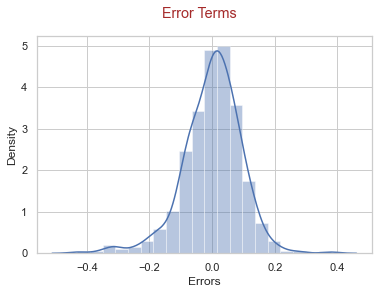

In [1224]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
plt.suptitle('Error Terms', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Brown'})       # Plot heading 
plt.xlabel('Errors', fontsize = 12)   

Error terms are normally distributed with mean zero.

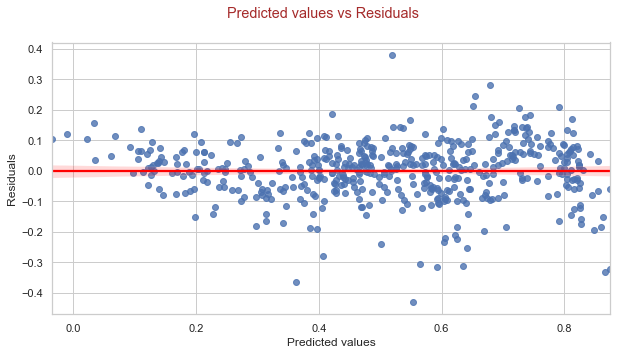

In [1240]:
#Plotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure(figsize = (10, 5))
sns.regplot(y_train_pred,res, line_kws={"color": "red"})
plt.suptitle('Predicted values vs Residuals', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})  
plt.xlabel('Predicted values', fontsize=12)   
plt.ylabel('Residuals', fontsize=12)  
plt.show()

Error terms have constant variance across all the values. No patterns are noticed.

By checking VIF and p values we can confirm that there is no multicollinearity between independent variables.
So, linear regression assumptions are valid. Will proceed to making predictions.

### Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. seventh model.

Apply Scaling on test sets.

In [1226]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.8318,0.7697,0.6574,0.0842,0.6927,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.9014,0.8426,0.6101,0.1537,0.7120,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.5120,0.4961,0.8377,0.3342,0.3034,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.8816,0.7953,0.4371,0.3396,0.5474,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.8172,0.7415,0.3143,0.5374,0.5690,0,1,...,0,0,0,0,0,1,0,0,0,0


In [1227]:
df_test.describe()

,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snowrain,weathersit_Misty
count,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,...,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000
mean,0.5589,0.5330,0.6385,0.3133,0.5206,0.2557,0.2648,0.2329,0.0594,0.0868,...,0.0822,0.0868,0.1279,0.1187,0.1461,0.1644,0.1644,0.1005,0.0274,0.3196
std,0.2337,0.2179,0.1490,0.1599,0.2184,0.4373,0.4423,0.4236,0.2368,0.2821,...,0.2753,0.2821,0.3347,0.3242,0.3540,0.3715,0.3715,0.3013,0.1636,0.4674
min,0.0466,0.0260,0.2619,-0.0428,0.0482,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3546,0.3448,0.5273,0.1985,0.3775,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.5587,0.5492,0.6277,0.2995,0.5243,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.7591,0.7141,0.7439,0.4030,0.6727,1.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
max,0.9844,0.9809,1.0021,0.8075,0.9633,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Dividing in to X_test and y_test

In [1228]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1229]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_cols_lm7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1230]:
# Making predictions
y_pred = lr7.predict(X_test_new)

### Model Evaluation

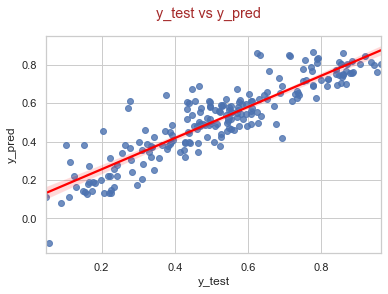

In [1231]:
# Plotting y_test and y_pred to understand the spread and regression line
#fig = plt.figure()
sns.regplot(y_test,y_pred, line_kws={"color": "red"})
plt.suptitle('y_test vs y_pred', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Brown'})   # Plot heading 
plt.xlabel('y_test', fontsize=12)                     # X-label
plt.ylabel('y_pred', fontsize=12)                     #y -label
plt.show()


Looking at RMSE

In [1232]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.09644955796369283

Checking the R-squared on the test set

In [1233]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8041402474517902

In [1246]:
# We can calculate Adjusted R2 for test data using the formula
# n is number of rows in X

n = X_test_new.shape[0]

# Number of predictors/features p is the shape along axis 1
p = X_test_new.shape[1]

# Find the Adjusted R-squared using the formula
adjusted_r2 = 1-((1-r_squared)*(n-1)/(n-p-1))
adjusted_r2

219
10


0.7947239131946648

R2 score for train data : 0.827

Adjusted R2 score for train data : 0.824

R2 score for test data : 0.804

Adjusted R2 score for test data : 0.794

Overall the model generalizes the datset.

In [1234]:
#Check the coefficients of final model
lr7.params

const                        0.2671
year                         0.2354
holiday                     -0.0970
temp                         0.4078
windspeed                   -0.1356
season_spring               -0.1162
season_winter                0.0480
month_Sep                    0.0700
weathersit_Light_snowrain   -0.2885
weathersit_Misty            -0.0786
dtype: float64

We can see that the equation of our best fitted line is:

cnt= 0.2671+ 0.2354 * year + 0.4078 * temp + 0.048 * season_winter + 0.07 * month_Sep - 0.097 * holiday - 0.1356 * windspeed-0.1162 * season_spring - 0.2885 * weathersit_Light_snowrain -0.0786 * weathersit_Misty

All the positive coefficients such as temp, year, season_winter, month denotes that the increase in these values leads to increase in the target variable(cnt)

All the negative coefficients such as holiday,windspeed, weathersit denotes that the increase in these values leads to decrease in the target variable(cnt) and viceversa.

#### Final interpretation

Top features which explain variability of the demand are:
1. temperature
2. year
3. weathersit_Light_snowrain
4. windspeed
5. season_spring
6. month_Sep
7. weathersit_Misty
8. holiday
9. season_winter

Bike rentals are majorly effected by temperature, year, weather situations,season.

